In [24]:
from google.colab import files
uploaded = files.upload()


Saving ml_pipeline_utils.py to ml_pipeline_utils.py


In [1]:
!pip install gensim

In [ ]:
!pip install --force-reinstall gensim

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from clustering.py import *
from evaluation.py import *
from feature_extraction.py import *
from preprocessing.py import *
from visualization.py import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Load dataset
categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

df = fetch_20newsgroups(subset='all', categories=categories,
                       shuffle=False, remove=('headers', 'footers', 'quotes'))

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
# Preprocess data
news_df = pd.DataFrame({'text': df.data, 'category': df.target})
news_df['cleaned_text'] = news_df['text'].apply(preprocess_text)


In [10]:
X = vectorize_text(news_df['cleaned_text'])

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cef466414e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


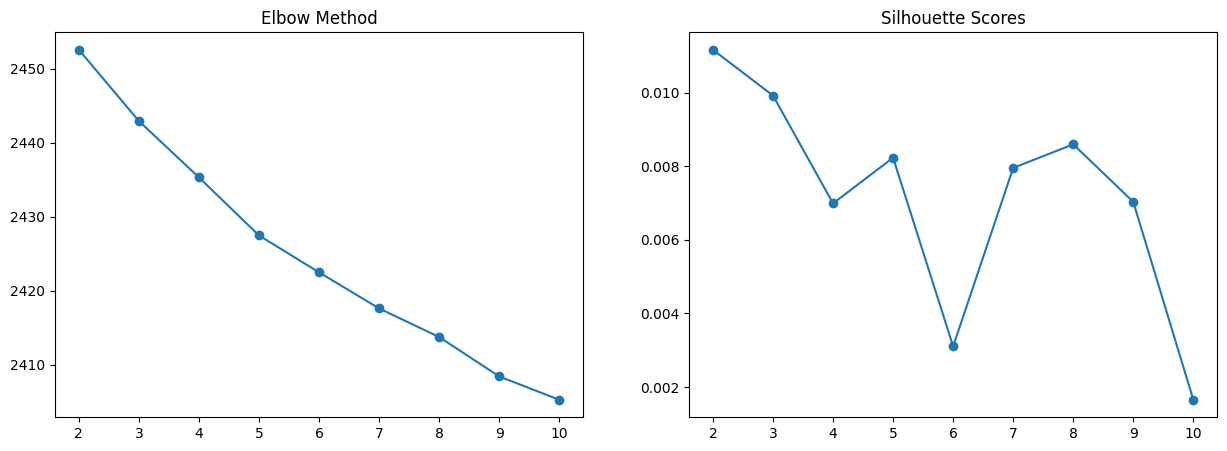

In [11]:
optimal_k = plot_elbow_and_silhouette(X)

In [14]:
# K-means clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=100)
kmeans_labels = kmeans.fit_predict(X)
print("K-means Results:", evaluate_clustering(X, kmeans_labels, news_df['category']))

K-means Results: {'silhouette': 0.009917230386795853, 'purity': 0.6676970633693973}


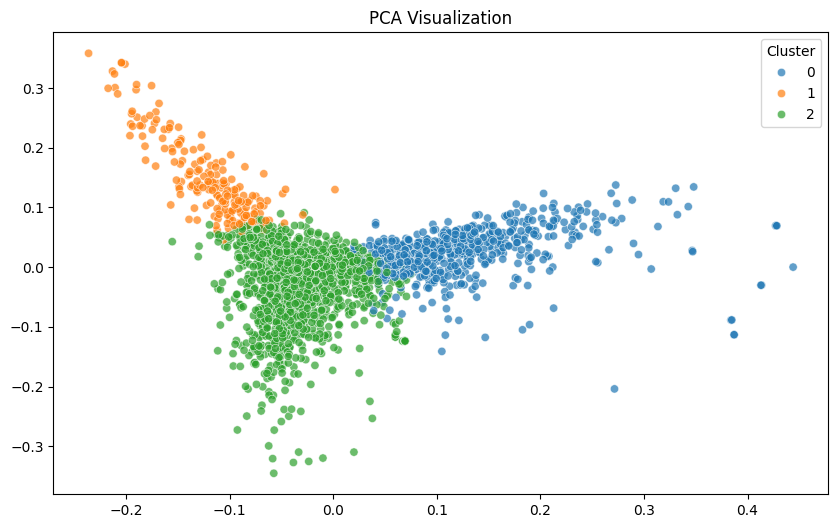

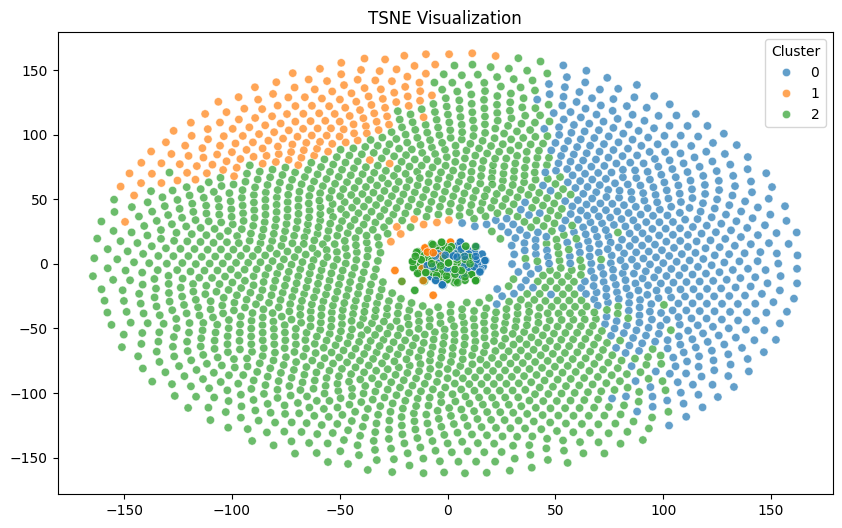

In [15]:
# Visualizations
visualize_clusters(X, kmeans_labels, 'PCA')
visualize_clusters(X, kmeans_labels, 'TSNE')

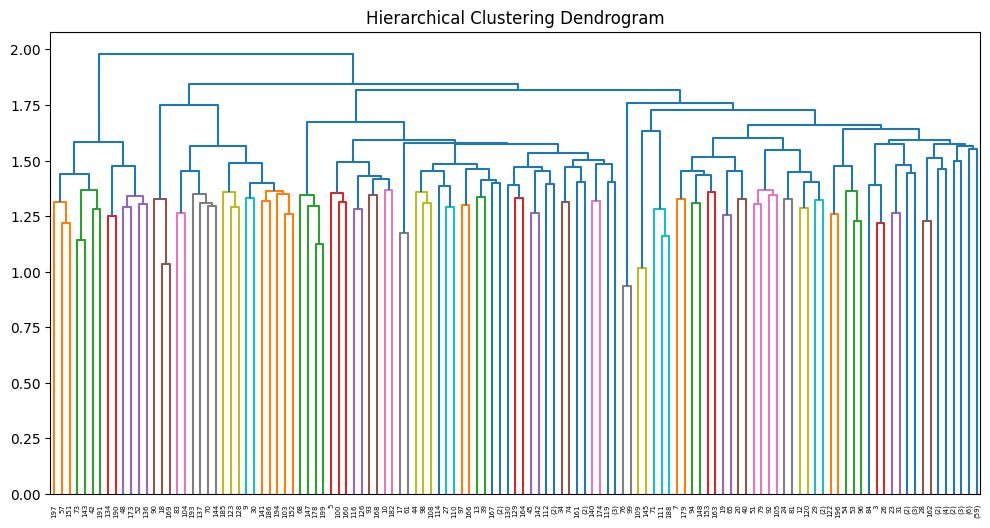

Hierarchical Results: {'silhouette': 0.008378685376159385}


In [16]:
# Hierarchical clustering
hierarchical_labels = hierarchical_clustering(X, n_clusters=optimal_k)
print("Hierarchical Results:", evaluate_clustering(X, hierarchical_labels))

In [18]:
# LDA clustering
lda_labels, perplexity = lda_clustering(vectorize_text(news_df['cleaned_text'], 'count'), optimal_k)
print("LDA Results:", evaluate_clustering(X, lda_labels, news_df['category']))
print(f"Perplexity: {perplexity:.4f}")


LDA Results: {'silhouette': -0.21769452107570614, 'purity': 0.6499227202472952}
Perplexity: 11294.8086


In [19]:
# AgglomerativeClustering
num_clusters = 3
hierarchy = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
cluster_labels = hierarchy.fit_predict(X.toarray())

In [20]:
print("K-means Results:", evaluate_clustering(X, cluster_labels, news_df['category']))

K-means Results: {'silhouette': 0.008378685376159385, 'purity': 0.6437403400309119}


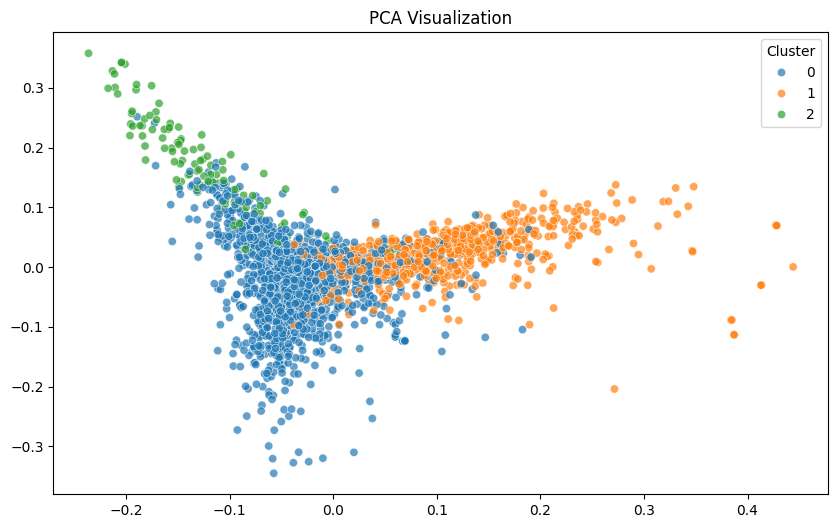

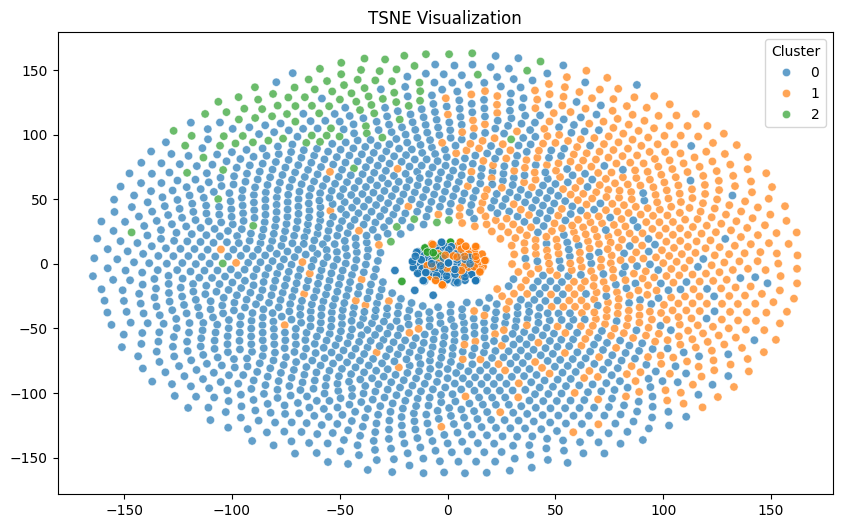

In [21]:
# Visualizations
visualize_clusters(X, cluster_labels, 'PCA')
visualize_clusters(X, cluster_labels, 'TSNE')

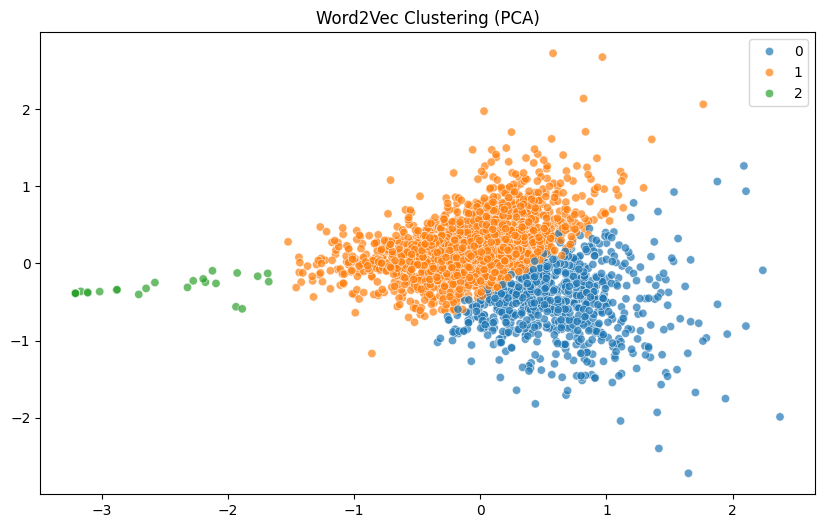

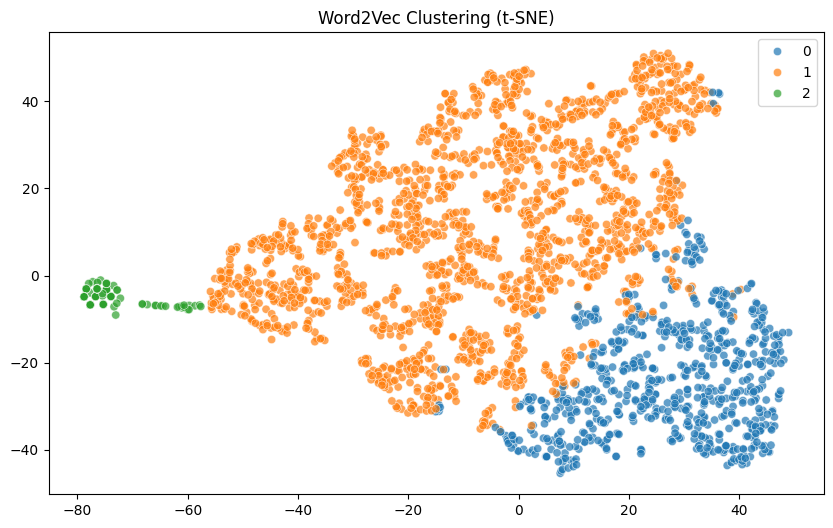

Word2Vec Clustering Metrics:
Silhouette Score: 0.3748
Purity Score: 0.5808


In [9]:
# Word2Vec Clustering
w2v_results = word2vec_clustering(
    text_series=news_df['cleaned_text'],
    n_clusters=3,
    true_labels=news_df['category']
)

print("Word2Vec Clustering Metrics:")
print(f"Silhouette Score: {w2v_results['metrics']['silhouette']:.4f}")
print(f"Purity Score: {w2v_results['metrics']['purity']:.4f}")